In [24]:
import odrive
from odrive.enums import *
import time
import numpy as np
from matplotlib import pyplot as plt
import goto 

In [69]:
# # connect_with_odrive
odrv0 = odrive.find_any()

# # shows the voltage supplied to odrive
print(str(odrv0.vbus_voltage))
# # Controller configuring prarameters
odrv0.axis0.motor.config.current_lim = 30
odrv0.axis0.controller.config.vel_limit = 200
odrv0.config.enable_brake_resistor = True
odrv0.config.brake_resistance = 2

# # Motor Configuration Parameters
odrv0.axis0.motor.config.pole_pairs = 7
odrv0.axis0.motor.config.torque_constant = 8.27/360
odrv0.axis0.motor.config.motor_type = MOTOR_TYPE_HIGH_CURRENT

# # Encoder Configuration Parameters
odrv0.axis0.encoder.config.cpr = 4000

# #calibration
# odrv0.save_configuration()
print('configuration saved successfully')

23.129810333251953
configuration saved successfully


In [70]:
odrv0.axis0.requested_state = AXIS_STATE_FULL_CALIBRATION_SEQUENCE

In [42]:
odrv0.axis0.encoder.set_linear_count(0)

# # Initiate Close loop
odrv0.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
odrv0.axis0.controller.config.control_mode = CONTROL_MODE_POSITION_CONTROL
dtpts=50;
t = np.linspace(-np.pi, np.pi, dtpts) 
enc = np.zeros_like(t)
# for i in range (len(t)): 
#     setpoint = np.sin(t[i]) #should it be 2piT?
#     while(True):
#         odrv0.axis0.controller.input_pos = setpoint
#         print(odrv0.axis0.encoder.pos_estimate);
#         if(abs(odrv0.axis0.encoder.pos_estimate) >= abs(setpoint)):
#             break
#     print("doneee");
#     enc[i] = odrv0.axis0.encoder.pos_estimate 

i=0
setpoint = np.sin(t[i])
while(True):
    odrv0.axis0.controller.input_pos = setpoint
    if(abs(odrv0.axis0.encoder.pos_estimate-setpoint)<0.01):
        
        enc[i] = odrv0.axis0.encoder.pos_estimate
        i+=1
        if(i>dtpts-1):
            break
        setpoint = np.sin(t[i])
        
        
odrv0.axis0.requested_state = AXIS_STATE_IDLE

# Plotting 
plt.plot(t, np.sin(t), label="Setpoint")
plt.plot(t, enc, label="Estimated value")
plt.legend()
plt.show()

KeyboardInterrupt: 

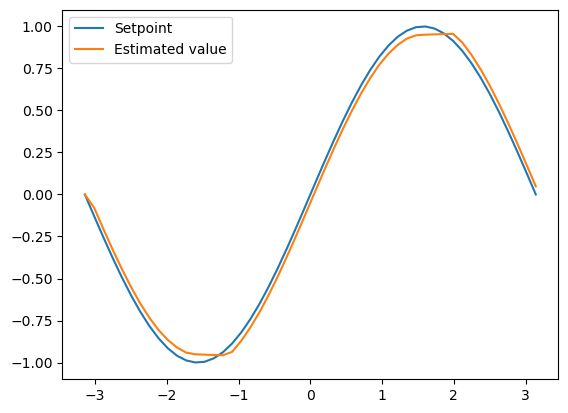

In [ ]:
# Plotting 
plt.plot(t, np.sin(t), label="Setpoint")
plt.plot(t, enc, label="Estimated value")
plt.legend()
plt.show()

In [52]:
odrv0.axis0.encoder.set_linear_count(0)

odrv0.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
odrv0.axis0.controller.config.control_mode = ControlMode.VELOCITY_CONTROL
odrv0.axis0.controller.config.vel_ramp_rate = 0.5
odrv0.axis0.controller.config.input_mode = InputMode.VEL_RAMP

dtpts=100;
t = np.linspace(0, 14, dtpts) 
vell=np.zeros(100000)

i=0
setpoint_vel = 20
while(True):
    odrv0.axis0.controller.input_vel = setpoint_vel
    vell[i] = odrv0.axis0.encoder.vel_estimate
    i+=1
    # print(odrv0.axis0.encoder.vel_estimate)
    if(abs(odrv0.axis0.encoder.vel_estimate-setpoint_vel)<0.001):
        break
        # setpoint_vel = np.sin(t[i])

odrv0.axis0.requested_state = AXIS_STATE_IDLE

# Plotting 
# plt.plot(t, 7, label="Setpoint")
plt.plot( vell, label="Estimated value")
plt.legend()
plt.show()

KeyboardInterrupt: 

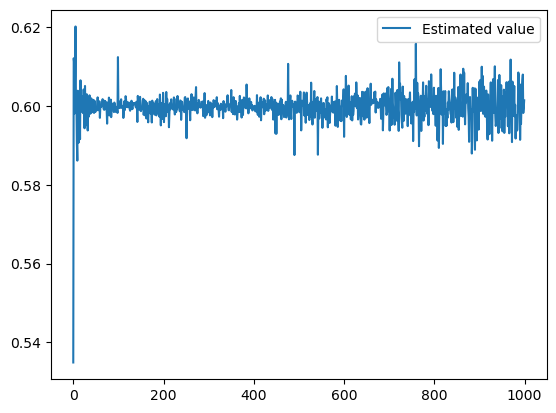

In [73]:
odrv0.axis0.encoder.set_linear_count(0)
odrv0.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
odrv0.axis0.controller.config.control_mode = ControlMode.TORQUE_CONTROL
# odrv0.axis0.controller.config.enable_torque_mode_vel_limit = False
odrv0.axis0.controller.input_torque = 1
tor=[]
i=0
while(i<500):
    tor.append(odrv0.axis0.motor.current_control.Iq_measured*odrv0.axis0.motor.config.torque_constant)
    i+=1

odrv0.axis0.requested_state = AXIS_STATE_IDLE
    
plt.plot( tor, label="Estimated value")
plt.legend()
plt.show()

In [4]:
odrv0.axis0.motor.current_control.Iq_measured

0.0